# Отчет по предмету "Численные методы решения дифференциальных уравнений" 7

Выполнил **Свистельников Илья**


## Задание
 Решить краевую задачу для дифференциального уравнения эллиптического типа. Аппроксимацию уравнения произвести с использованием центрально-разностной схемы. Для решения дискретного аналога применить следующие методы: метод простых итераций (метод Либмана), метод Зейделя, метод простых итераций с верхней релаксацией. Вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,y)$.  Исследовать зависимость погрешности от сеточных параметров $h_x$, $h_y$.

**Вариант 1**:

$\frac{\partial^2 U}{\partial x^2} + \frac{\partial^2 U}{\partial y^2} = 0$

$U(0,y) = y$

$U(1,y) = 1 + y$

$U_y(x,0) = x$

$U_y(x,1) = 1 + x$


Аналитическое решение:

$U(x,y) = x + y$



## Решение

### **1. Дискретизация с использованием центрально-разностной схемы**

Зададим равномерную сетку в области $[0, 1] \times [0, 1]$:

- $x_i = i h_x, \quad i = 0, 1, \dots, N_x$
- $y_j = j h_y, \quad j = 0, 1, \dots, N_y$

где $h_x = \frac{1}{N_x}$, $h_y = \frac{1}{N_y}$.

**Дискретизация уравнения:**

Для каждой внутренней точки сетки $(x_i, y_j)$:

$$
\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h_x^2} + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{h_y^2} = 0
$$

**Обработка граничных условий:**
- **При $x = 0$ (условие Дирихле):**

  $$
  u_{0,j} = y_j
  $$

- **При $x = 1$ (условие Дирихле):**

  $$
  u_{1,j} = 1 + y_j
  $$
  
- **При $y = 0$ (условие Дирихле):**

  $$
  u_{x,0} = x_j
  $$

- **При $y = 1$ (условие Дирихле):**

  $$
  u_{x,1} = 1 + x_j
  $$

### **2. Формирование системы уравнений**

**Внутренние узлы (1 ≤ $i$ ≤ $N_x - 1$, 1 ≤ $j$ ≤ $N_y - 1$)**

Дискретизированное уравнение принимает вид:

$$
\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h_x^2} + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{h_y^2} = 0
$$


### **3. Итерационные методы**
Будем использовать три итерационных метода для решения дискретизированной системы уравнений.

#### **1. Метод простой итерации (метод Либманна)**

Обновляющая формула для внутренней точки:

$$
u_{i,j}^{(k+1)} = \frac{h_y^2(u_{i+1,j}^{(k)} + u_{i-1,j}^{(k+1)}) + h_x^2(u_{i,j+1}^{(k)} + u_{i,j-1}^{(k+1)})}{2h_x^2 + 2h_y^2}
$$

На каждом шаге обновляем значения $u_{i,j}$ для всех внутренних узлов, используя значения из предыдущей итерации $(k)$.

#### **2. Метод Гаусса-Зейделя**

Метод Гаусса-Зейделя использует обновлённые значения в текущей итерации, когда это возможно:

$$
u_{i,j}^{(k+1)} = \frac{h_y^2(u_{i+1,j}^{(k)} + u_{i-1,j}^{(k+1)}) + h_x^2(u_{i,j+1}^{(k)} + u_{i,j-1}^{(k+1)})}{2h_x^2 + 2h_y^2}
$$

Здесь:
- $u_{i-1,j}^{(k+1)}$ и $u_{i,j-1}^{(k+1)}$ — значения, обновлённые в текущей итерации.
- $u_{i+1,j}^{(k)}$ и $u_{i,j+1}^{(k)}$ — значения из предыдущей итерации.


#### **3. Метод релаксации**

Метод добавляет параметр релаксации $\omega$, который позволяет ускорить сходимость за счет использования момента:

$$
u_{i,j}^{(k+1)} = (1 - \omega) u_{i,j}^{(k)} + \omega \left(\frac{h_y^2(u_{i+1,j}^{(k)} + u_{i-1,j}^{(k+1)}) + h_x^2(u_{i,j+1}^{(k)} + u_{i,j-1}^{(k+1)})}{2h_x^2 + 2h_y^2}\right)
$$

- $\omega = 1$ возвращает нас к методу Гаусса-Зейделя.

### Программный код

In [ ]:
#%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


In [ ]:
def solve_pde_liebmann(Nx, Ny, tol=1e-8, max_iter=30000):

    # Параметры сетки
    x = np.linspace(0.0, 1, Nx)
    y = np.linspace(0.0, 1, Ny)
    hx = x[1] - x[0]
    hy = y[1] - y[0]

    # Коэффициенты
    A = hx**2
    B = hy**2
    D = 2 * (A + B)
    u = np.zeros((Nx, Ny))

    u[0, :] = y
    u[-1, :] = 1 + y
    u[:, 0] = x
    u[:, -1] = 1 + x

    error = tol + 1
    iteration = 0

    # Итерационный процесс
    while error > tol and iteration < max_iter:
        u_old = u.copy()
        max_diff = 0.0

        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                try:
                    u_ijm1 = u_old[i, j - 1]
                    u_ijp1 = u_old[i, j + 1]
                    u_im1j = u_old[i - 1, j]
                    u_ip1j = u_old[i + 1, j]
                except Exception as e:
                    print(e)
                    print(i, j, Ny, Nx)

                u[i, j] = (A * (u_ijp1 + u_ijm1) + B * (u_ip1j + u_im1j)) / D

                max_diff = max(max_diff, abs(u[i, j] - u_old[i, j]))

        error = max_diff
        iteration += 1

    return x, y, u, iteration

In [ ]:
# Решение уравнения методом верхней релаксации
def solve_pde_sor(Nx, Ny, omega=1.0, tol=1e-6, max_iter=10000):
    x = np.linspace(0.0, 1, Nx)
    y = np.linspace(0.0, 1, Ny)
    hx = x[1] - x[0]
    hy = y[1] - y[0]

    A = hx**2
    B = hy**2
    D = 2 * (A + B)

    u = np.zeros((Nx, Ny))
    u[0, :] = y
    u[-1, :] = 1 + y
    u[:, 0] = x
    u[:, -1] = 1 + x

    error = tol + 1
    iteration = 0


    while error > tol and iteration < max_iter:
        max_diff = 0.0
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                try:
                    u_ijm1 = u[i, j - 1]
                    u_ijp1 = u[i, j + 1]
                    u_im1j = u[i - 1, j]
                    u_ip1j = u[i + 1, j]

                except Exception as e:
                    print(e)

                rhs = A * (u_ip1j + u_im1j) + B * (u_ijp1 + u_ijm1)
                u_new = (1 - omega) * u[i, j] + omega * (rhs / D)
                max_diff = max(max_diff, abs(u_new - u[i, j]))
                u[i, j] = u_new

        error = max_diff
        iteration += 1

    return u, iteration

In [ ]:
# Функция для оценки ошибки
def calculate_error(U_exact, U_numeric):
    return np.max(np.abs(U_exact - U_numeric))

# Функция аналитического решения
def analytical_solution(x, y):
    return x + y

In [ ]:
Nx = 31
Ny = 31
tol = 1e-5

x, y, U_lieb, iter_lieb = solve_pde_liebmann(Nx, Ny, tol=tol)
U_zeid,iter_zeid = solve_pde_sor(Nx, Ny, tol=tol)
U_relax,iter_relax = solve_pde_sor(Nx, Ny, omega=0.6, tol=tol)

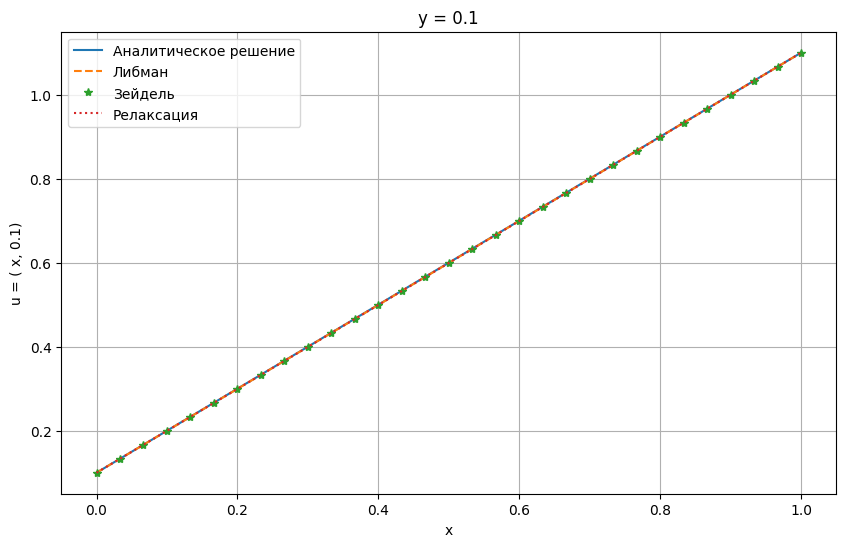

In [ ]:
i = 3
y_target = y[i]
# print(U_lieb)
# print(f"Либман: итераций={iter_lieb}, погрешность={calculate_error(analytical_solution(x, y),U_lieb.T)}")
# print(f"Зейдель: итераций={iter_zeid}, погрешность={calculate_error(analytical_solution(x, y),U_zeid)}")
# print(f"Зейдель: итераций={iter_relax}, погрешность={calculate_error(analytical_solution(x, y),U_relax)}")
plt.figure(figsize=(10, 6))
plt.xlabel('x')
plt.ylabel(f'u = ( x, {y_target})')
plt.title(f"y = {y_target}")
plt.plot(x, analytical_solution(x, y_target),label = 'Аналитическое решение', )
plt.plot(x, U_lieb[:,i], '--', label = "Либман")
plt.plot(x, U_zeid[:,i], '*', label = "Зейдель")
plt.plot(x, U_relax[:,i],':', label = "Релаксация")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def real_z(lx0, lx1, ly0, ly1, f):
    x = np.arange(lx0, lx1 + 0.005, 0.005)
    y = np.arange(ly0, ly1 + 0.005, 0.005)
    X = np.ones((y.shape[0], x.shape[0]))
    Y = np.ones((x.shape[0], y.shape[0]))
    Z = np.ones((y.shape[0], x.shape[0]))
    for i in range(Y.shape[0]):
        Y[i] = y
    Y = Y.T
    for i in range(X.shape[0]):
        X[i] = x
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = f(X[i, j], Y[i, j])
    return X, Y, Z


In [ ]:
from matplotlib import cm

In [ ]:
y_target = 0.5
U_exact = analytical_solution(x, y_target)
X = np.ones((y.shape[0], x.shape[0]))
Y = np.ones((x.shape[0], y.shape[0]))
print(X.shape, Y.shape)
for i in range(Y.shape[0]):
    Y[i] = y
Y = Y.T
for i in range(X.shape[0]):
    X[i] = x
Z_1 = U_lieb
Z_2 = U_zeid
Z_3 = U_relax

(31, 31) (31, 31)


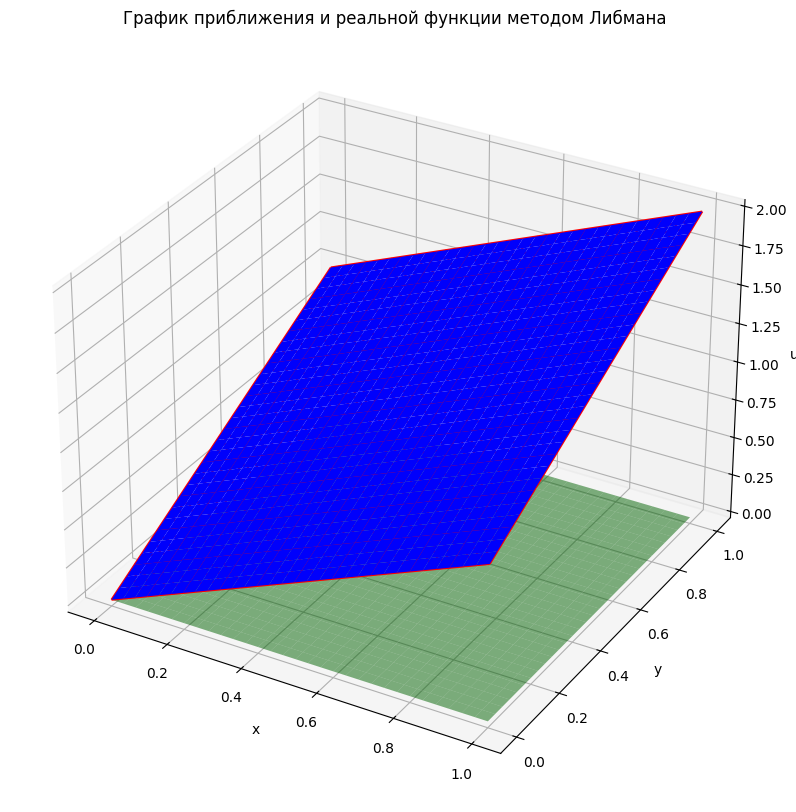

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
U_X, U_Y, U_Z = real_z(x[0], x[-1], y[0], y[-1], analytical_solution)
ax.plot_wireframe(U_X, U_Y, U_Z, color="red")
ax.plot_surface(X, Y, Z_1.T, color='blue')
ax.set(xlabel='x', ylabel='y', zlabel='u', title='График приближения и реальной функции методом Либмана')

# Добавление графика ошибок
error_surface = np.abs(Z_1.T - U_exact)*0 # Вычисляем ошибку
ax.plot_surface(X, Y, error_surface, color='green', alpha=0.5)  # График ошибок

#ax.view_init(0, 90)

plt.show()

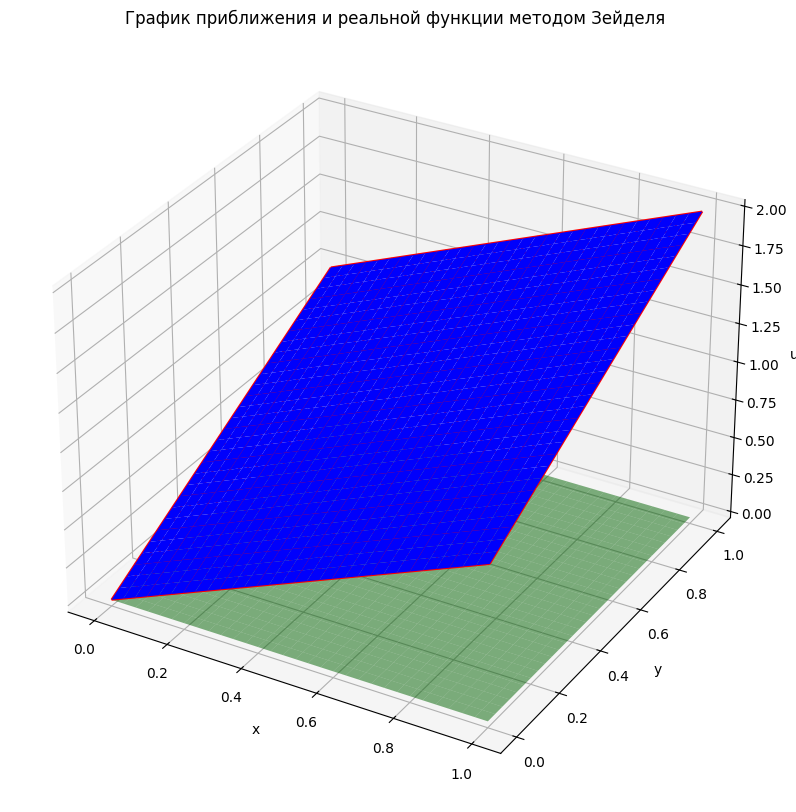

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(*real_z(x[0], x[-1], y[0], y[-1], analytical_solution), color="red")
# print(X.shape, Y.shape, Z.shape)
# ax.plot_surface(X, Y, Z_1.T)
ax.plot_surface(X, Y, Z_2.T, color='blue')
# ax.plot_surface(X, Y, Z_3.T)
ax.set(xlabel='x', ylabel='y', zlabel='u', title='График приближения и реальной функции методом Зейделя')
# ax.view_init(azim=80)
error_surface = np.abs(Z_2.T - U_exact) * 0 # Вычисляем ошибку
ax.plot_surface(X, Y, error_surface, color='green', alpha=0.5)  # График ошибок
plt.show()

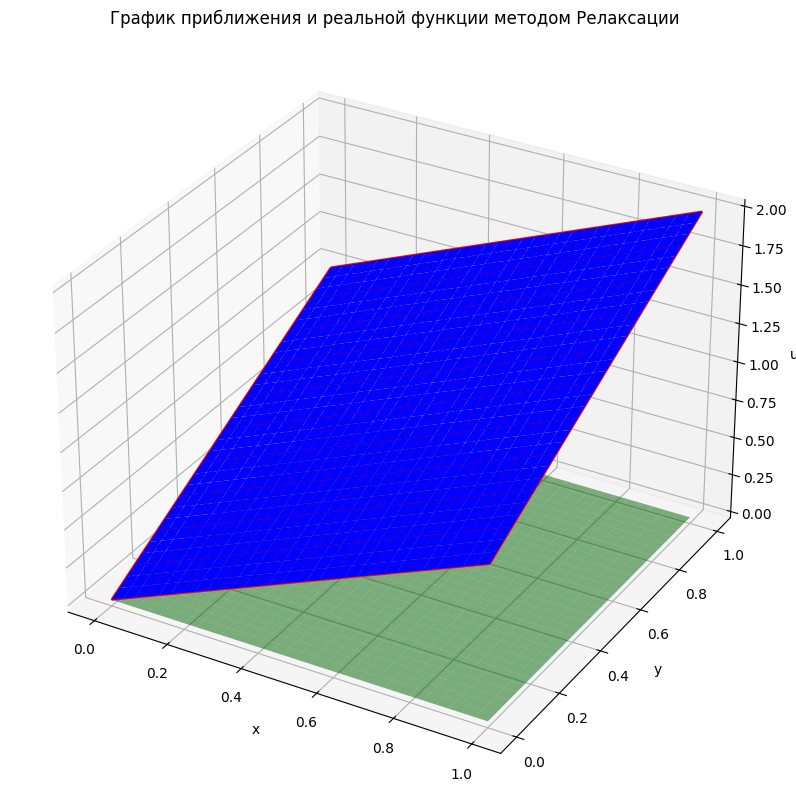

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(*real_z(x[0], x[-1], y[0], y[-1], analytical_solution), color="red")
# print(X.shape, Y.shape, Z.shape)
# ax.plot_surface(X, Y, Z_1.T)
# ax.plot_surface(X, Y, Z_2.T)
ax.plot_surface(X, Y, Z_3.T, color='blue')
ax.set(xlabel='x', ylabel='y', zlabel='u', title='График приближения и реальной функции методом Релаксации')
# ax.view_init(azim=80)
error_surface = np.abs(Z_3.T - U_exact) * 0 # Вычисляем ошибку
ax.plot_surface(X, Y, error_surface, color='green', alpha=0.5)  # График ошибок
plt.show()